# Random Forest - Algorithm
This code shows the implementation of Random Forest algorithm using Decision Trees as Black Box learners


## Imports
import the necessary libraries from sklearn, matplotlib and numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
warnings.filterwarnings('ignore')

## Function to create a mesh

In [2]:
def make_mesh(X):
    h =  0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    return xx,yy

Run inference on mesh

In [3]:
def run_mesh(xx,yy,clf):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return Z

## Functions to plot the Decision Regions
This function takes a classifier and the Dataset, then plots the decision regions and the data points of the dataset in those regions.

In [4]:
def Decision_Regions(X_train,y_train,X_test,y_test,X,y,a,b,i,selected_dims,selected_points,ind_fig):

    xx,yy = make_mesh(X)
    
    plt.figure(ind_fig.number)
    ax=plt.subplot(a,b,i+1)
    ax.scatter(X_train[selected_points, 0], X_train[selected_points, 1], c=y_train[selected_points], cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    if selected_dims[0] == 0:
        Z = clf.predict_proba(np.c_[xx.ravel()])[:,1]
    if selected_dims[0] == 1:
        Z = clf.predict_proba(np.c_[yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    Z_values.append(Z)


Final Decision region Function

In [5]:
def final_Decision_Region(X_train,y_train,X_test,y_test,X,final_Z,final_fig):
    xx, yy = make_mesh(X)
    plt.figure(final_fig.number)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:], cmap=cm_bright, edgecolors='k')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
    plt.contourf(xx, yy, final_Z, cmap=cm, alpha=.8)
    plt.colorbar()
    plt.show()

## Initialize
Initialize the Colour Maps for the plots, set the random seed and the number of samples to choose from the make_moons dataset

In [6]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
np.random.seed(100)
n_samples=100

Initialize the number of estimators

In [7]:
a=3
b=3
n_est=a*b

## Create the make_moons Dataset
Sample n_samples number of points from the dataset while adding some noise

In [8]:
X,y=make_moons(noise=0.05, random_state=1)

Splitting the data into Train and Test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
n_train=X_train.shape[0]

The subset of features to fit on each tree

In [10]:
dims=X.shape[1]
dims_per_tree=int(np.round(dims/2))

Intializations for the individual classifiers, feature subsets, intermediate and final figures

In [11]:
individual_classifiers=[]
individual_selected_dims=[]
Z_values=[]
y_pred_values=[]
final_fig=plt.figure(figsize=(10,8))
ind_fig=plt.figure(figsize=(10,8))


## Algorithm
This loop randomly selects a subset of the features without replacement. Then it fits all the Decision Tree estimators on the make_moons samples and computes the respective losses.

In [12]:
for i in range(n_est):
    '''
    Randomly select a subset of the features for each Decision Tree, without replacement.
    '''
    selected_dims=np.random.choice(dims,dims_per_tree, replace=False)
    selected_dims.sort()
    individual_selected_dims.append(selected_dims)
    '''
    Randomly choose 50% of the data for training
    '''
    selected_points=np.random.choice(n_train, int(0.5*n_train))
    selected_points.sort()
    
    '''
    Setup the train and test data
    '''
    X_train_dim_redu = X_train[:,selected_dims]
    X_train_cur = X_train_dim_redu[selected_points,:]
    y_train_cur = y_train[selected_points]
    X_test_cur = X_test[:,selected_dims]
    y_test_cur = y_test

    
    '''
    Fit the individual Decision Tree Classifiers on the train data
    '''
    clf=DecisionTreeClassifier(max_depth=5)
    clf.fit(X_train_cur, y_train_cur)
    
    '''
    Perform inference on the test data
    '''
    y_pred_value = clf.predict_proba(X_test[:,selected_dims])[:,1]
    y_pred_values.append(y_pred_value)
    individual_classifiers.append(clf)

    '''
    Compute loss on test data
    '''
    loss = np.mean(np.abs((y_pred_value>0.5) - y_test_cur))
    print('loss of individual tree classifier ', i, ' is ',loss)

    
    '''
    Plot the decision regions of individual classifiers
    '''
    Decision_Regions(X_train,y_train,X_test,y_test,X,y,a,b,i,selected_dims,selected_points,ind_fig)

loss of individual tree classifier  0  is  0.225
loss of individual tree classifier  1  is  0.225
loss of individual tree classifier  2  is  0.2
loss of individual tree classifier  3  is  0.225
loss of individual tree classifier  4  is  0.125
loss of individual tree classifier  5  is  0.15
loss of individual tree classifier  6  is  0.25
loss of individual tree classifier  7  is  0.35
loss of individual tree classifier  8  is  0.175


Make predictions and draw contours of final classifier

loss of random forest classifier  8  is  0.125


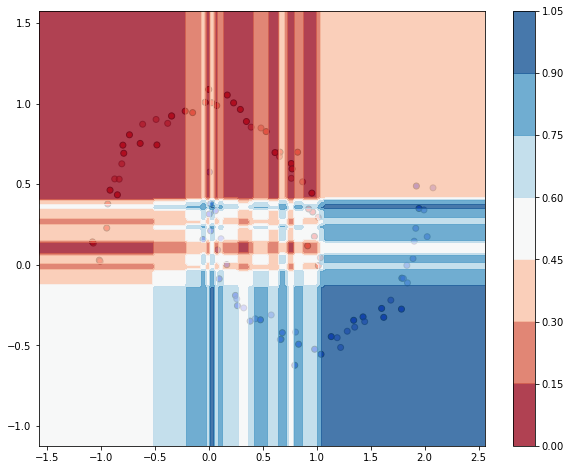

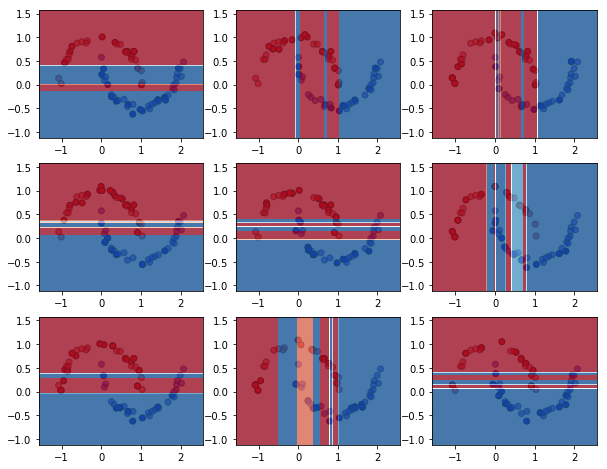

In [13]:
'''
Averaging the predictions of the individual Decision Tree estimators
'''
xx,yy = make_mesh(X)
final_Z=np.zeros(xx.shape)
final_y_pred=np.zeros(y_pred_value.shape)
for i in range(n_est):
    final_Z += Z_values[i]
    final_y_pred += y_pred_values[i]
final_Z /= n_est
final_y_pred /= n_est

'''
Computing the final loss
'''
loss = np.mean(np.abs((final_y_pred>0.5) - y_test))
print('loss of random forest classifier ', i, ' is ', loss)


'''
Plot the Decision Region of the final classifier
'''
final_Decision_Region(X_train,y_train,X_test,y_test,X,final_Z,final_fig)

